In [5]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

on_base = pl.scan_parquet("../data/throw_home_runner_on_third_wide_sprint_arm.parquet")
on_base = on_base.filter(pl.col("event_type").is_in(["sac_fly", "field_out"]))
on_base = on_base.with_columns(
    pl.col("event_type").replace({"sac_fly": "Successful", "field_out": "Unsuccessful"})
)

In [6]:
sprint_split_85_pd = on_base.select(["seconds_since_hit_085_mlb_person_id_R3", "event_type"]).drop_nulls().collect().to_pandas()

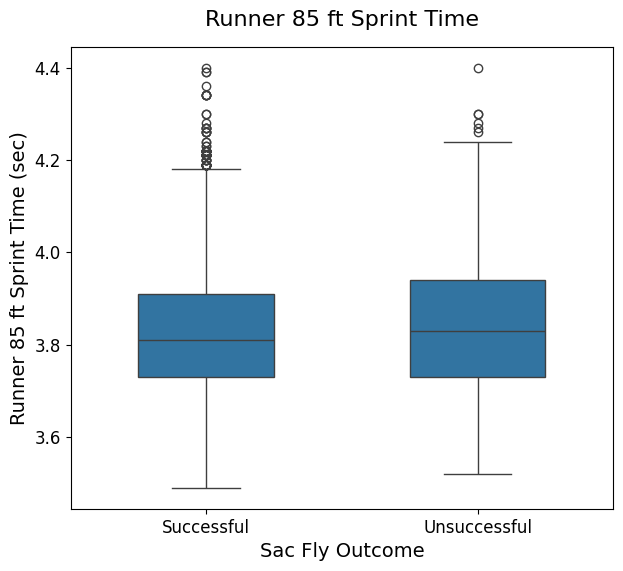

In [7]:
# --- Plot for distance_traveled_fielder ---
plt.figure(figsize=(7, 6))
sns.boxplot(x='event_type', y='seconds_since_hit_085_mlb_person_id_R3', data=sprint_split_85_pd, width=0.5)
plt.title('Runner 85 ft Sprint Time', fontsize=16, pad=15)
plt.xlabel('Sac Fly Outcome', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Runner 85 ft Sprint Time (sec)', fontsize=14)
plt.show()